In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df_infarto = pd.read_csv('../data/bq-results-infarto-2015-2022.csv')

/var/folders/ym/vtsfljl13gj6ms14j1387nhc0000gn/T/ipykernel_15559/4018039245.py:1: DtypeWarning: Columns (57,60,61,74,86) have mixed types. Specify dtype option on import or set low_memory=False.
  df_infarto = pd.read_csv('../data/bq-results-infarto-2015-2022.csv')


In [32]:
# Filtrar o DataFrame para pessoas com 60 anos ou mais
df_infarto_maior_60 = df_infarto[df_infarto['idade'] >= 60]

# Filtrar o DataFrame para pessoas com menos de 60 anos
df_infarto_menor_60 = df_infarto[df_infarto['idade'] < 60]


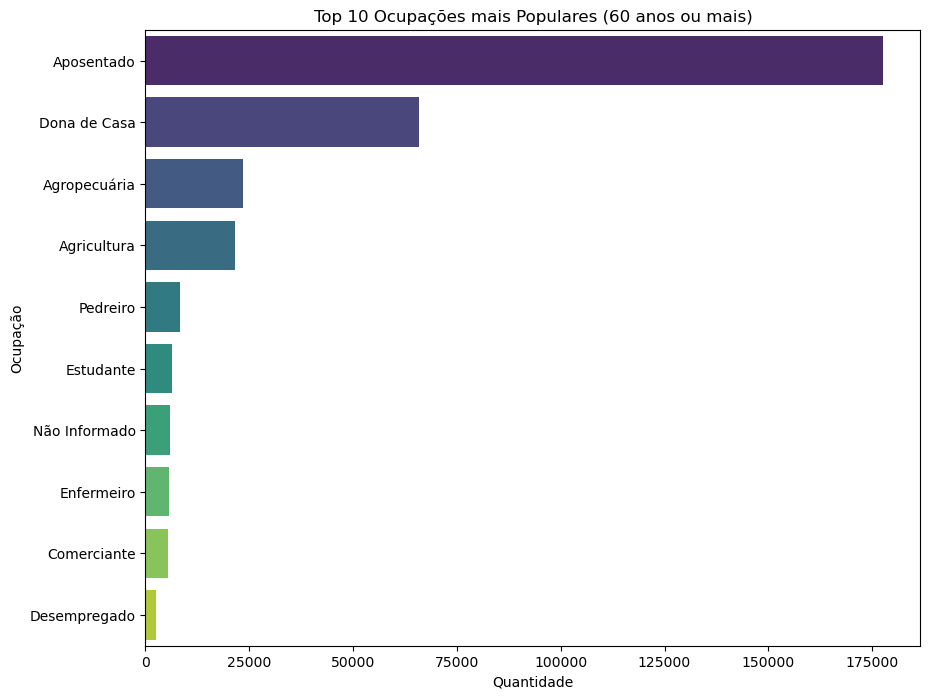

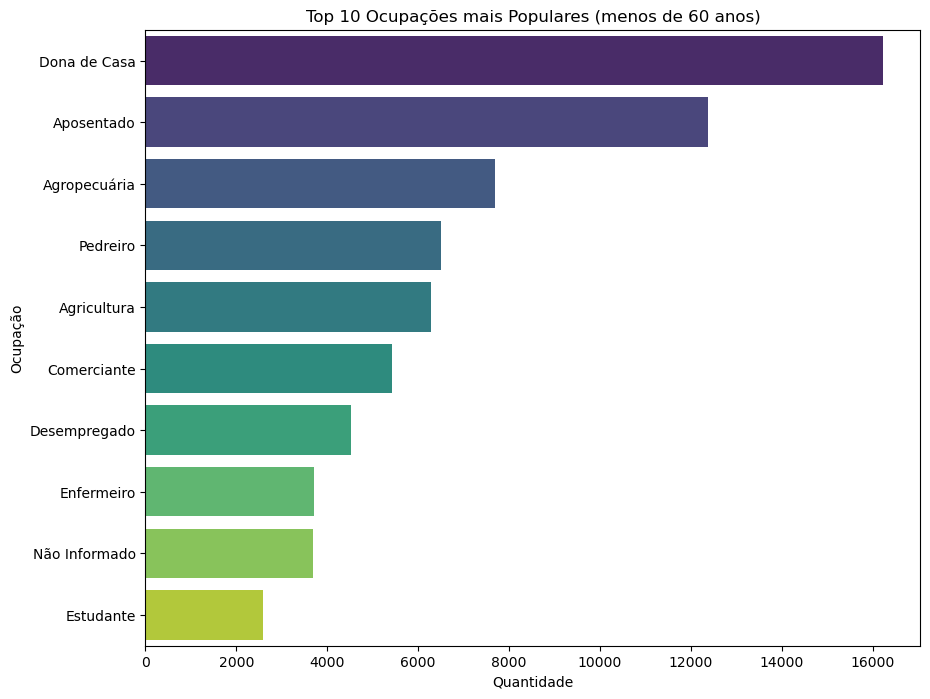

Proporção de Ocupações (60 anos ou mais):
ocupacao
Aposentado       54.99
Dona de Casa     20.39
Agropecuária      7.28
Agricultura       6.65
Pedreiro          2.61
Estudante         2.01
Não Informado     1.80
Enfermeiro        1.79
Comerciante       1.68
Desempregado      0.80
Name: count, dtype: float64

Proporção de Ocupações (menos de 60 anos):
ocupacao
Dona de Casa     23.53
Aposentado       17.92
Agropecuária     11.15
Pedreiro          9.43
Agricultura       9.09
Comerciante       7.87
Desempregado      6.54
Enfermeiro        5.36
Não Informado     5.36
Estudante         3.75
Name: count, dtype: float64


In [33]:
# Mapeamento para ocupação
mapeamento_ocupacao = {
    999992.0: 'Dona de Casa',
    999993.0: 'Aposentado',
    621005.0: 'Agropecuária',
    715210.0: 'Pedreiro',
    622020.0: 'Agricultura',
    354705.0: 'Comerciante',
    999994.0: 'Desempregado',
    512105.0: 'Enfermeiro',
    998999.0: 'Não Informado',
    141410.0: 'Estudante',
}

# Calcular as contagens de ocupações para pessoas com 60 anos ou mais
ocupacao_counts_maior_60 = df_infarto_maior_60['ocupacao'].map(mapeamento_ocupacao).value_counts().head(10)

# Calcular as contagens de ocupações para pessoas com menos de 60 anos
ocupacao_counts_menor_60 = df_infarto_menor_60['ocupacao'].map(mapeamento_ocupacao).value_counts().head(10)

# Plotar gráfico de contagem de ocupações para pessoas com 60 anos ou mais
plt.figure(figsize=(10, 8))
sns.barplot(x=ocupacao_counts_maior_60.values, y=ocupacao_counts_maior_60.index, palette='viridis')
plt.title('Top 10 Ocupações mais Populares (60 anos ou mais)')
plt.xlabel('Quantidade')
plt.ylabel('Ocupação')
plt.show()

# Plotar gráfico de contagem de ocupações para pessoas com menos de 60 anos
plt.figure(figsize=(10, 8))
sns.barplot(x=ocupacao_counts_menor_60.values, y=ocupacao_counts_menor_60.index, palette='viridis')
plt.title('Top 10 Ocupações mais Populares (menos de 60 anos)')
plt.xlabel('Quantidade')
plt.ylabel('Ocupação')
plt.show()

# Calcular a proporção de ocupações para pessoas com 60 anos ou mais
proporcao_ocupacoes_maior_60 = (ocupacao_counts_maior_60 / ocupacao_counts_maior_60.sum() * 100).round(2)

# Calcular a proporção de ocupações para pessoas com menos de 60 anos
proporcao_ocupacoes_menor_60 = (ocupacao_counts_menor_60 / ocupacao_counts_menor_60.sum() * 100).round(2)

# Imprimir a proporção de ocupações para pessoas com 60 anos ou mais
print("Proporção de Ocupações (60 anos ou mais):")
print(proporcao_ocupacoes_maior_60)

# Imprimir a proporção de ocupações para pessoas com menos de 60 anos
print("\nProporção de Ocupações (menos de 60 anos):")
print(proporcao_ocupacoes_menor_60)


Distribuição do Local de Ocorrência (60 anos ou mais):
local_ocorrencia
Hospital                            243102
Domicílio                           172776
Outros estabelecimentos de saúde     46932
Outros                               14814
Via pública                           6208
Ignorado                               235
Name: count, dtype: int64

Proporções em % (60 anos ou mais):
local_ocorrencia
Hospital                            50.219800
Domicílio                           35.691916
Outros estabelecimentos de saúde     9.695172
Outros                               3.060263
Via pública                          1.282443
Ignorado                             0.048546
Name: count, dtype: float64

Distribuição do Local de Ocorrência (menos de 60 anos):
local_ocorrencia
Hospital                            71161
Domicílio                           48582
Outros estabelecimentos de saúde    19355
Outros                               8089
Via pública                          5222
Ign

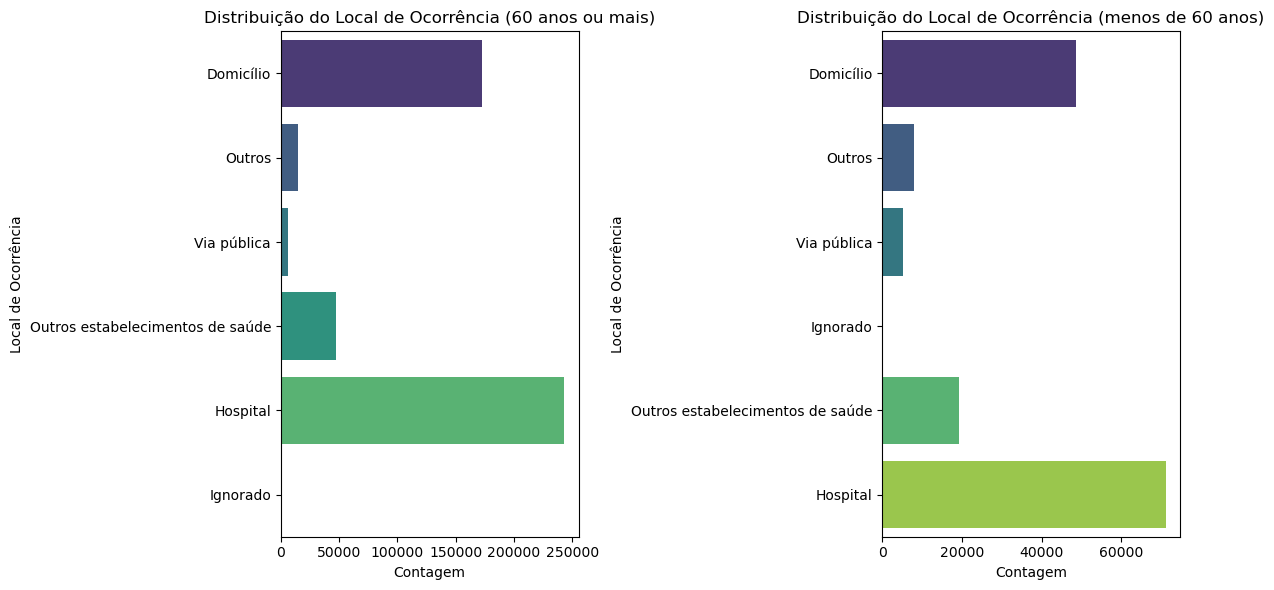

In [34]:
# Criar um mapeamento para os valores do local de ocorrência
mapeamento_local_ocorrencia = {
    1: 'Hospital',
    2: 'Outros estabelecimentos de saúde',
    3: 'Domicílio',
    4: 'Via pública',
    5: 'Outros',
    9: 'Ignorado'
}

# Aplicar o mapeamento às colunas correspondentes em ambos os DataFrames
df_infarto_maior_60 = df_infarto_maior_60.copy()  # Criar uma cópia para evitar o SettingWithCopyWarning
df_infarto_menor_60 = df_infarto_menor_60.copy()  # Criar uma cópia para evitar o SettingWithCopyWarning
df_infarto_maior_60['local_ocorrencia'] = df_infarto_maior_60['local_ocorrencia'].map(mapeamento_local_ocorrencia)
df_infarto_menor_60['local_ocorrencia'] = df_infarto_menor_60['local_ocorrencia'].map(mapeamento_local_ocorrencia)

# Calcular as contagens para cada local de ocorrência em ambos os DataFrames
local_counts_maior_60 = df_infarto_maior_60['local_ocorrencia'].value_counts()
local_counts_menor_60 = df_infarto_menor_60['local_ocorrencia'].value_counts()

# Calcular as proporções em relação ao total em ambos os DataFrames
total_registros_maior_60 = len(df_infarto_maior_60)
total_registros_menor_60 = len(df_infarto_menor_60)

proporcoes_locais_maior_60 = local_counts_maior_60 / total_registros_maior_60 * 100
proporcoes_locais_menor_60 = local_counts_menor_60 / total_registros_menor_60 * 100

# Imprimir as contagens e proporções
print("Distribuição do Local de Ocorrência (60 anos ou mais):")
print(local_counts_maior_60)
print("\nProporções em % (60 anos ou mais):")
print(proporcoes_locais_maior_60)

print("\nDistribuição do Local de Ocorrência (menos de 60 anos):")
print(local_counts_menor_60)
print("\nProporções em % (menos de 60 anos):")
print(proporcoes_locais_menor_60)

# Plotar gráficos de contagem para o local de ocorrência em ambos os grupos
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=df_infarto_maior_60, y='local_ocorrencia', palette='viridis')
plt.title('Distribuição do Local de Ocorrência (60 anos ou mais)')
plt.xlabel('Contagem')
plt.ylabel('Local de Ocorrência')

plt.subplot(1, 2, 2)
sns.countplot(data=df_infarto_menor_60, y='local_ocorrencia', palette='viridis')
plt.title('Distribuição do Local de Ocorrência (menos de 60 anos)')
plt.xlabel('Contagem')
plt.ylabel('Local de Ocorrência')

plt.tight_layout()
plt.show()


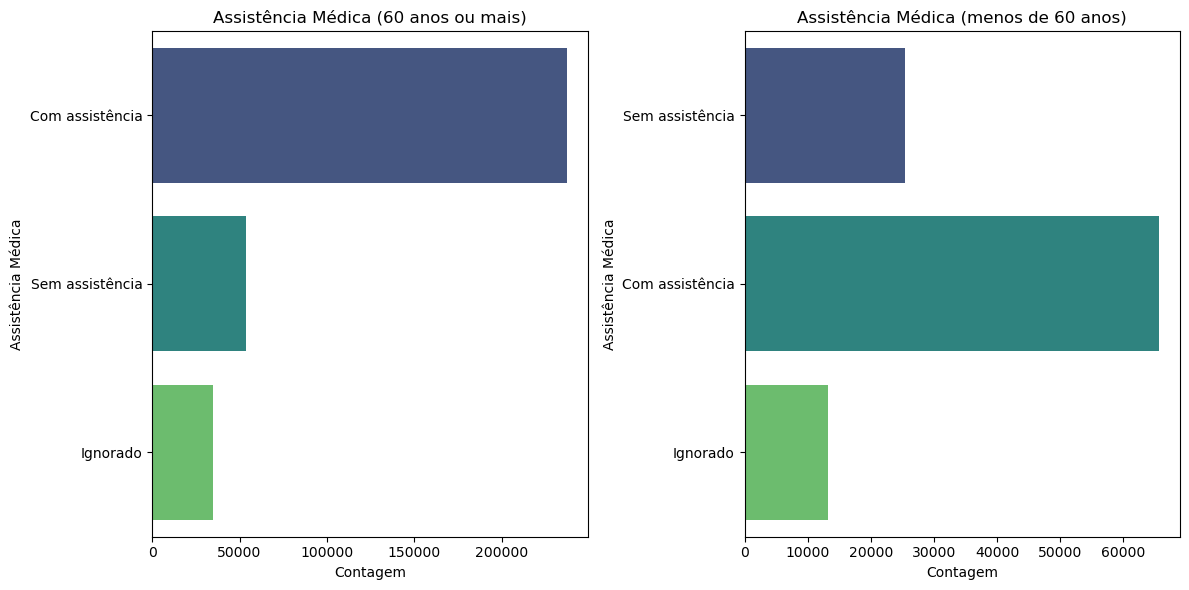

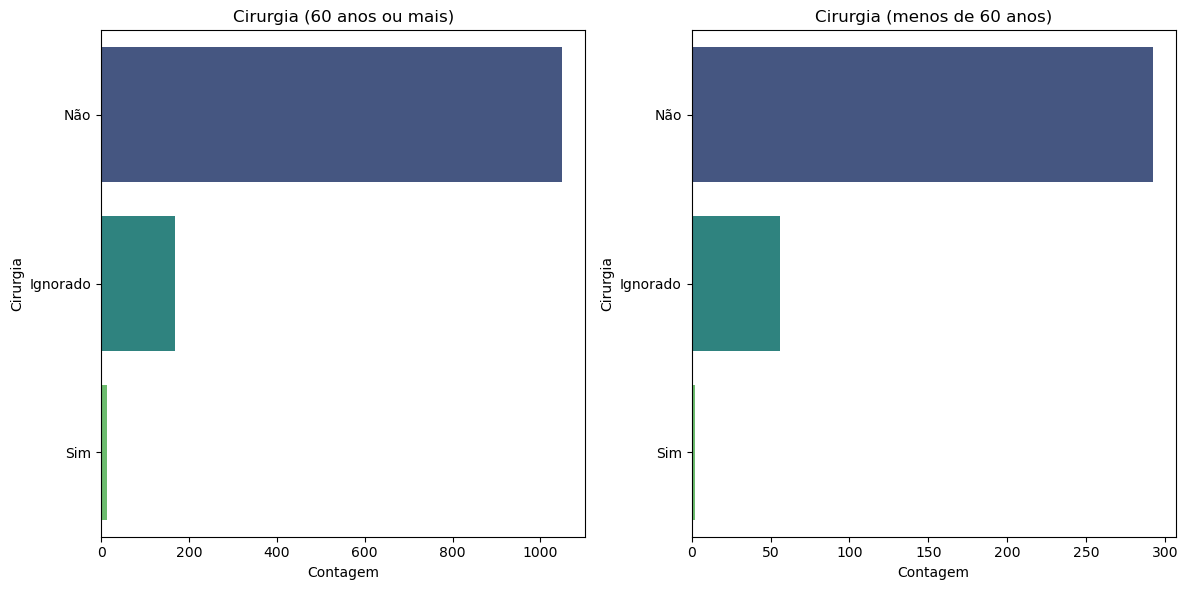

Contagem de Assistência Médica (60 anos ou mais):
 assistencia_medica
Com assistência    237179
Sem assistência     53912
Ignorado            34560
Name: count, dtype: int64

Proporções de Assistência Médica (60 anos ou mais) (%):
 assistencia_medica
Com assistência    48.996232
Sem assistência    11.137094
Ignorado            7.139375
Name: count, dtype: float64

Contagem de Assistência Médica (menos de 60 anos):
 assistencia_medica
Com assistência    65676
Sem assistência    25331
Ignorado           13134
Name: count, dtype: int64

Proporções de Assistência Médica (menos de 60 anos) (%):
 assistencia_medica
Com assistência    43.064535
Sem assistência    16.609838
Ignorado            8.612120
Name: count, dtype: float64

Contagem de Cirurgia (60 anos ou mais):
 cirurgia
Não         1050
Ignorado     169
Sim           13
Name: count, dtype: int64

Proporções de Cirurgia (60 anos ou mais) (%):
 cirurgia
Não         0.216908
Ignorado    0.034912
Sim         0.002686
Name: count, dtype: 

In [35]:
# Mapeamento para assistência médica
mapeamento_assistencia = {
    9: 'Ignorado',
    1: 'Com assistência',
    2: 'Sem assistência'
}

# Mapeamento para cirurgia
mapeamento_cirurgia = {
    9: 'Ignorado',
    1: 'Sim',
    2: 'Não'
}

# Aplicar os mapeamentos às colunas correspondentes em ambos os DataFrames
df_infarto_maior_60['assistencia_medica'] = df_infarto_maior_60['assistencia_medica'].map(mapeamento_assistencia)
df_infarto_maior_60['cirurgia'] = df_infarto_maior_60['cirurgia'].map(mapeamento_cirurgia)

df_infarto_menor_60['assistencia_medica'] = df_infarto_menor_60['assistencia_medica'].map(mapeamento_assistencia)
df_infarto_menor_60['cirurgia'] = df_infarto_menor_60['cirurgia'].map(mapeamento_cirurgia)

# Plotar gráfico de contagem para assistência médica nos dois grupos etários
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=df_infarto_maior_60, y='assistencia_medica', palette='viridis')
plt.title('Assistência Médica (60 anos ou mais)')
plt.xlabel('Contagem')
plt.ylabel('Assistência Médica')

plt.subplot(1, 2, 2)
sns.countplot(data=df_infarto_menor_60, y='assistencia_medica', palette='viridis')
plt.title('Assistência Médica (menos de 60 anos)')
plt.xlabel('Contagem')
plt.ylabel('Assistência Médica')

plt.tight_layout()
plt.show()

# Plotar gráfico de contagem para cirurgia nos dois grupos etários
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=df_infarto_maior_60, y='cirurgia', palette='viridis')
plt.title('Cirurgia (60 anos ou mais)')
plt.xlabel('Contagem')
plt.ylabel('Cirurgia')

plt.subplot(1, 2, 2)
sns.countplot(data=df_infarto_menor_60, y='cirurgia', palette='viridis')
plt.title('Cirurgia (menos de 60 anos)')
plt.xlabel('Contagem')
plt.ylabel('Cirurgia')

plt.tight_layout()
plt.show()

# Calculando contagens e proporções para assistência médica nos dois grupos etários
contagem_assistencia_medica_maior_60 = df_infarto_maior_60['assistencia_medica'].value_counts()
proporcoes_assistencia_medica_maior_60 = contagem_assistencia_medica_maior_60 / len(df_infarto_maior_60) * 100

contagem_assistencia_medica_menor_60 = df_infarto_menor_60['assistencia_medica'].value_counts()
proporcoes_assistencia_medica_menor_60 = contagem_assistencia_medica_menor_60 / len(df_infarto_menor_60) * 100

# Calculando contagens e proporções para cirurgia nos dois grupos etários
contagem_cirurgia_maior_60 = df_infarto_maior_60['cirurgia'].value_counts()
proporcoes_cirurgia_maior_60 = contagem_cirurgia_maior_60 / len(df_infarto_maior_60) * 100

contagem_cirurgia_menor_60 = df_infarto_menor_60['cirurgia'].value_counts()
proporcoes_cirurgia_menor_60 = contagem_cirurgia_menor_60 / len(df_infarto_menor_60) * 100

# Imprimir as contagens e proporções
print("Contagem de Assistência Médica (60 anos ou mais):\n", contagem_assistencia_medica_maior_60)
print("\nProporções de Assistência Médica (60 anos ou mais) (%):\n", proporcoes_assistencia_medica_maior_60)
print("\nContagem de Assistência Médica (menos de 60 anos):\n", contagem_assistencia_medica_menor_60)
print("\nProporções de Assistência Médica (menos de 60 anos) (%):\n", proporcoes_assistencia_medica_menor_60)

print("\nContagem de Cirurgia (60 anos ou mais):\n", contagem_cirurgia_maior_60)
print("\nProporções de Cirurgia (60 anos ou mais) (%):\n", proporcoes_cirurgia_maior_60)
print("\nContagem de Cirurgia (menos de 60 anos):\n", contagem_cirurgia_menor_60)
print("\nProporções de Cirurgia (menos de 60 anos) (%):\n", proporcoes_cirurgia_menor_60)
